In [1]:
# !pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
files = os.listdir("T_newsgroups")
documents = []
for fn in files:
    file_loc = r"T_newsgroups\\" + fn
    with open(file_loc, "r") as f:
        documents.append(f.read())

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw
import re
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

class LemmaTokenizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, document):
        lemmas = []
        pat = re.compile(r'[^a-zA-Z ]+')
        for t in word_tokenize(document):
            t = t.strip()
            lemma = self.lemmatizer.lemmatize(t)
            lemma = re.sub(pat, '', lemma)
            if len(lemma) <= 2:
                continue
            lemmas.append(lemma)
        return lemmas


lemmaTokenizer = LemmaTokenizer()
vectorizer = TfidfVectorizer(tokenizer=lemmaTokenizer, 
                             stop_words="english",
                             max_features=1000)
tfidf_X = vectorizer.fit_transform(documents)
print(tfidf_X.shape)
vectorizer.get_feature_names_out()

(4000, 1000)


array(['ability', 'able', 'abuse', 'access', 'accessdigexnet', 'accident',
       'according', 'act', 'action', 'active', 'activity', 'actually',
       'add', 'addition', 'address', 'administration', 'advance',
       'advantage', 'age', 'agency', 'agent', 'ago', 'agree', 'ahead',
       'aid', 'air', 'allen', 'allow', 'allowed', 'alomar', 'amendment',
       'america', 'american', 'analysis', 'andy', 'animal', 'answer',
       'antibiotic', 'anybody', 'apparently', 'application', 'approach',
       'apr', 'april', 'area', 'argument', 'arm', 'armed', 'article',
       'ask', 'asked', 'assault', 'associated', 'assume', 'astronomy',
       'atf', 'atlanta', 'atmosphere', 'attack', 'attempt', 'attention',
       'attitude', 'author', 'authority', 'available', 'average', 'avoid',
       'away', 'baalke', 'bad', 'ball', 'baltimore', 'bank', 'base',
       'baseball', 'based', 'basic', 'basically', 'basis', 'bat', 'batf',
       'batter', 'batting', 'bear', 'begin', 'beginning', 'believe',


In [4]:
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn.metrics import silhouette_score

for i in range(3,21):
    kmeans = BisectingKMeans(n_clusters = i)
    labels = kmeans.fit_predict(tfidf_X)
    
    print(i, "->" , silhouette_score(tfidf_X, labels) )

3 -> 0.012016477137096838
4 -> 0.013147316946881203
5 -> 0.012514891605475338
6 -> 0.014454545566978604
7 -> 0.015528450573044467
8 -> 0.014839374930389336
9 -> 0.012590157875884323
10 -> 0.014097214350477987
11 -> 0.012189573371089533
12 -> 0.01583781486274977
13 -> 0.01857630012005801
14 -> 0.015261968369866914
15 -> 0.01814863615418486
16 -> 0.019232016809328054
17 -> 0.01740799408096263
18 -> 0.012380837281165524
19 -> 0.01633558385763117
20 -> 0.016280609588235365


In [5]:
true_k = 6
kmeans = BisectingKMeans(n_clusters = true_k)
labels = kmeans.fit_predict(tfidf_X)

C:\Users\User\jupytervenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


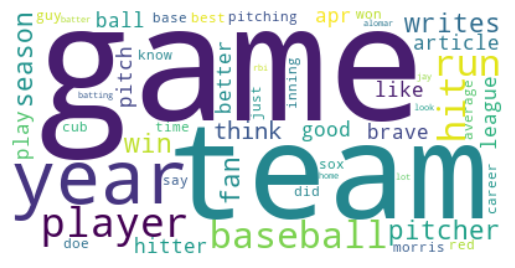

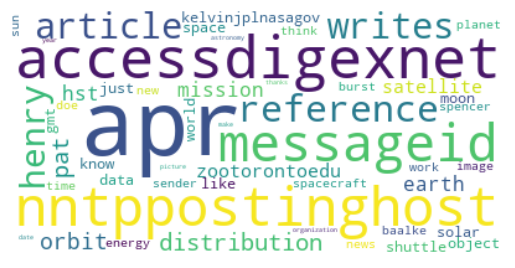

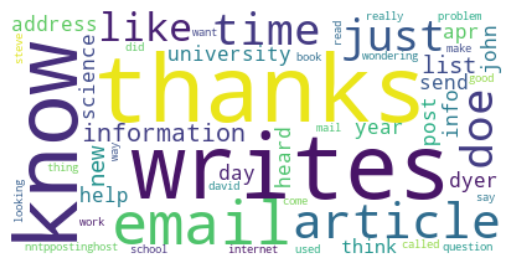

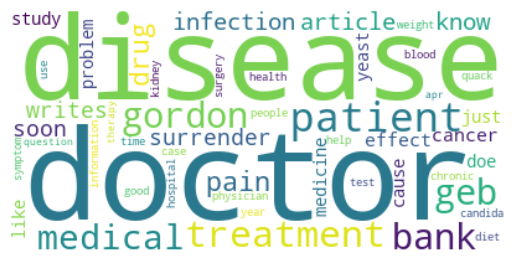

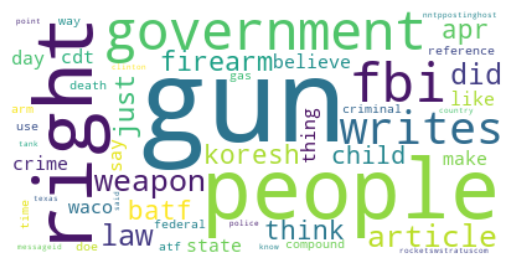

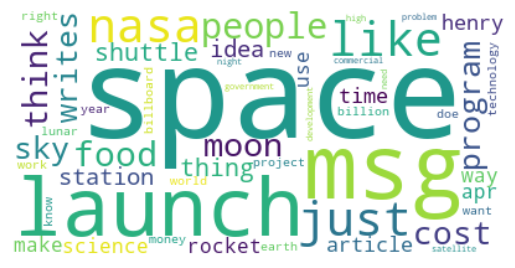

In [6]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def frequencies_dict(cluster_index):
    if cluster_index > true_k - 1:
        return
    term_frequencies = kmeans.cluster_centers_[cluster_index]
    sorted_terms = centroids[cluster_index]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    return frequencies

def makeImage(frequencies):

    wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
  
centroids = kmeans.cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = vectorizer.get_feature_names()

for i in range(true_k):
    freq = frequencies_dict(i)
    makeImage(freq)
    print()